In [22]:
import pandas as pd
X_train = pd.read_csv("breast-cancer-X_train.csv")

pandas.core.frame.DataFrame

In [29]:
X_train.dtypes

diagnosis              float64
radius_mean            float64
texture_mean           float64
perimeter_mean         float64
area_mean              float64
smoothness_mean        float64
compactness_mean       float64
concavity_mean         float64
concave points_mean    float64
dtype: object

In [26]:
X_train = X_train.drop(columns=['Unnamed: 0'])

In [30]:
X_train.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean
0,0.0,0.155190,0.169090,0.154861,0.075546,0.416990,0.221489,0.083903,0.101243
1,0.0,0.257892,0.246534,0.240550,0.141591,0.207096,0.046500,0.031443,0.084443
2,1.0,0.483648,0.500845,0.486559,0.333362,0.491740,0.501871,0.396439,0.394831
3,0.0,0.344503,0.286101,0.327759,0.207678,0.118534,0.100669,0.057990,0.068290
4,0.0,0.036869,0.501522,0.028540,0.015907,0.000000,0.074351,0.000000,0.000000


In [31]:
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
result = []
for i in range(1,60):
    modelK = KNeighborsClassifier(n_neighbors=i)
    modelK.fit(X_train, y_train)
    s = make_scorer(f1_score, pos_label='bad')
    scores = cross_val_score(modelK, X_train, y_train, cv=5, scoring=s)
    f1 = scores.mean()
    result.append((i, f1))

TypeError: '<' not supported between instances of 'str' and 'int'

[]

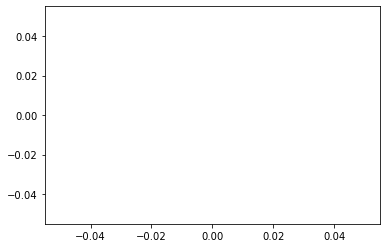

In [5]:
import matplotlib.pyplot as plt
plt.plot(*zip(*result))

In [6]:
result[0:5]

[]

In [8]:
modelK = KNeighborsClassifier(n_neighbors=2)
modelK.fit(X_train, y_train)
s = make_scorer(f1_score, pos_label='bad')
scores = cross_val_score(modelK, X_train, y_train, cv=5, scoring=s)
y_pred = cross_val_predict(modelK, X_train, y_train, cv=5)
print("f1_score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

ValueError: could not convert string to float: 'B'

In [9]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, y_pred))
from sklearn.metrics import classification_report, plot_confusion_matrix
print(classification_report(y_train, y_pred))

NameError: name 'y_pred' is not defined